# 有效的数独

**题目来源：力扣（LeetCode）**

**链接：https://leetcode-cn.com/problems/valid-sudoku/**

## 一、题目

判断一个 9x9 的数独是否有效。只需要根据以下规则，验证已经填入的数字是否有效即可。

- 数字 1-9 在每一行只能出现一次。
- 数字 1-9 在每一列只能出现一次。
- 数字 1-9 在每一个以粗实线分隔的 3x3 宫内只能出现一次。

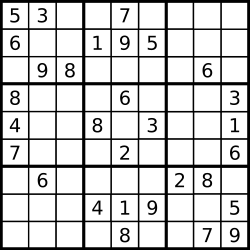

上图是一个部分填充的有效的数独。

数独部分空格内已填入了数字，空白格用 '.' 表示。

### 说明:

- 一个有效的数独（部分已被填充）不一定是可解的。
- 只需要根据以上规则，验证已经填入的数字是否有效即可。
- 给定数独序列只包含数字 1-9 和字符 '.' 。
- 给定数独永远是 9x9 形式的。

## 二、示例

### 示例 1:

输入:
```
[
  ["5","3",".",".","7",".",".",".","."],
  ["6",".",".","1","9","5",".",".","."],
  [".","9","8",".",".",".",".","6","."],
  ["8",".",".",".","6",".",".",".","3"],
  ["4",".",".","8",".","3",".",".","1"],
  ["7",".",".",".","2",".",".",".","6"],
  [".","6",".",".",".",".","2","8","."],
  [".",".",".","4","1","9",".",".","5"],
  [".",".",".",".","8",".",".","7","9"]
]
```
输出: true

### 示例 2:

输入:
```
[
  ["8","3",".",".","7",".",".",".","."],
  ["6",".",".","1","9","5",".",".","."],
  [".","9","8",".",".",".",".","6","."],
  ["8",".",".",".","6",".",".",".","3"],
  ["4",".",".","8",".","3",".",".","1"],
  ["7",".",".",".","2",".",".",".","6"],
  [".","6",".",".",".",".","2","8","."],
  [".",".",".","4","1","9",".",".","5"],
  [".",".",".",".","8",".",".","7","9"]
]
```
输出: false

解释: 除了第一行的第一个数字从 5 改为 8 以外，空格内其他数字均与 示例1 相同。但由于位于左上角的 3x3 宫内有两个 8 存在, 因此这个数独是无效的。

## 三、解题思路

### 轮询

- 实例化多个集合，分别存放每行，每列，每个小矩阵
- 轮询矩阵的每一个元素，判断在所属行、所属列、所属小矩阵是否存在
- 存在则无效
- 不存在则继续轮询，直至结束都未出现重复，则有效

In [1]:
def isValidSudoku(board) -> bool:
    row = [set() for i in range(9)]
    col = [set() for i in range(9)]
    small = [set() for i in range(9)]
    for x in range(9):
        for y in range(9):
            i_small = x // 3 + y // 3 * 3
            val = board[x][y]
            if val == '.':
                continue
            if val in row[x] or val in col[y] or val in small[i_small]:
                return False
            row[x].add(val)
            col[y].add(val)
            small[i_small].add(val)
    return True

In [2]:
isValidSudoku([
  ["5","3",".",".","7",".",".",".","."],
  ["6",".",".","1","9","5",".",".","."],
  [".","9","8",".",".",".",".","6","."],
  ["8",".",".",".","6",".",".",".","3"],
  ["4",".",".","8",".","3",".",".","1"],
  ["7",".",".",".","2",".",".",".","6"],
  [".","6",".",".",".",".","2","8","."],
  [".",".",".","4","1","9",".",".","5"],
  [".",".",".",".","8",".",".","7","9"]
])

True

In [3]:
isValidSudoku([
  ["8","3",".",".","7",".",".",".","."],
  ["6",".",".","1","9","5",".",".","."],
  [".","9","8",".",".",".",".","6","."],
  ["8",".",".",".","6",".",".",".","3"],
  ["4",".",".","8",".","3",".",".","1"],
  ["7",".",".",".","2",".",".",".","6"],
  [".","6",".",".",".",".","2","8","."],
  [".",".",".","4","1","9",".",".","5"],
  [".",".",".",".","8",".",".","7","9"]
])

False